<a href="https://colab.research.google.com/github/caiomtls/EFC1_GCC_253/blob/main/EFC1_GCC_253.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


- Integrantes:
  - Caio Matheus Leite da Silva    **Matricula**: 202010444
  - Katarina Lydia Friedrich    **Matricula**: 202010141

**Turma**: 10A

Link do repositório GitHub: 

● O trabalho deve ser feito em grupos de no máximo 2 componentes (todos devem enviar a atividade no Campus Virtual)

● Trabalhos entregues após a data limite não serão aceitos

● Data limite de entrega: 26 de Julho de 2022 : 23h55m

● Enviar o trabalho para o campus virtual, do seguinte modo: link do repositório GitHub e do Colab para acesso ao Notebook. A Documentação deve estar no readme

● O trabalho deve ser desenvolvido no modelo Notebook utilizando a linguagem Python

# Importações

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import inf # Infinito para o Merge Sort
import pickle # Para salvar variável
from copy import deepcopy

# Funções

In [ ]:
def gera_arranjo_aleatorio(n_elementos):
    A = np.random.randint(0, 1000, (n_elementos))
    return A

def gerar_grafico(comparacoes, nome_do_algoritmo = ''):
    
    x = [] # Para dar a medida em quantidade de elementos
    for i in range(0, 200):
        x.append(i*5)
    
    plt.figure(figsize=(14,9))
    plt.suptitle('Análise por n° de comparações ' + nome_do_algoritmo)
    plt.subplot(2, 2, 1)
    plt.plot(x, comparacoes['crescente'], label='Crescente', color='blue')
    plt.plot(x, comparacoes['aleatorio'], label='Aleatório', color='green')
    plt.plot(x, comparacoes['decrescente'], label='Decrescente', color='red')
    plt.xlabel("Tamanho do arranjo")
    plt.ylabel("N° de comparações")
    plt.legend(title='Estado dos arranjos')
    
    plt.subplot(2, 2, 2)
    plt.plot(x, comparacoes['crescente'], label='Crescente', color='blue')
    plt.xlabel("Tamanho do arranjo")
    plt.ylabel("N° de comparações")
    plt.legend(title='Estado dos arranjos')
    
    plt.subplot(2, 2, 3)
    plt.plot(x, comparacoes['aleatorio'], label='Aleatório', color='green')
    plt.xlabel("Tamanho do arranjo")
    plt.ylabel("N° de comparações")
    plt.legend(title='Estado dos arranjos')
    
    plt.subplot(2, 2, 4)
    plt.plot(x, comparacoes['decrescente'], label='Decrescente', color='red')
    plt.xlabel("Tamanho do arranjo")
    plt.ylabel("N° de comparações")
    plt.legend(title='Estado dos arranjos')
    
    plt.show()

def ordernar(arranjos, metodo):
    for chave in arranjos:
        for arranjo in arranjos[chave]:
            n_comparacoes = metodo(arranjo)
            comparacoes[chave].append(n_comparacoes)

def limpar_dicionario(dicionario):
    for chave in dicionario:
        dicionario[chave].clear()
        
def carregar_arranjos_originais():
    # Carrega os arranjos salvos
    with open('arranjos.pkl', 'rb') as file:
        arranjos = pickle.load(file)
    return arranjos

# Variáveis globais

In [ ]:
arranjos =  {'aleatorio' : [], 'crescente' : [], 'decrescente' : []}
comparacoes =  {'aleatorio' : [], 'crescente' : [], 'decrescente' : []}

In [ ]:
for i in range(5, 1001, 5): # Gerra 200 arranjos tamanho variando de 5 a 1000
    arranjo = gera_arranjo_aleatorio(i)
    arranjos['aleatorio'].append(arranjo)

    arranjo = np.sort(arranjo)
    arranjos['crescente'].append(arranjo) # Arranjo ordenado de maneira crescente

    arranjo = arranjo[::-1]
    arranjos['decrescente'].append(arranjo) # Arranjo ordenado de maneira decrescente

In [ ]:
# Salva os arranjos para uso futuro
with open('arranjos.pkl', 'wb') as file:
    pickle.dump(arranjos, file)

In [ ]:
# Carrega os arranjos salvos
with open('arranjos.pkl', 'rb') as file:
    arranjos = pickle.load(file)

# Funções de Ordenação

> Utilize este espaço para definir as funções de ordenação vista em sala de aula



##  Insertion Sort


In [ ]:
def insertionSort(arranjo):
    n_comparacoes = 0
    for j in range(1, len(arranjo)):
        n_comparacoes += 1
        chave = arranjo[j]
        i = j-1
        while i >= 0 and arranjo[i] > chave:
            arranjo[i+1] =  arranjo[i]
            i = i - 1
            n_comparacoes += 1
        arranjo[i+1] = chave
    n_comparacoes += 1
    return n_comparacoes

##  Merge Sort


In [ ]:
def merge(arranjo, ini, meio, fim):
    global n_comparacoes
    
    n1 = meio - ini + 1
    n2 = fim - meio
    L = np.empty(n1 + 1)
    R = np.empty(n2 + 1)
  
    for i in range(0, n1):
        L[i] = arranjo[ini + i]
        n_comparacoes += 1
    n_comparacoes += 1
    
    for j in range(0, n2):
        R[j] = arranjo[meio + j + 1]
        n_comparacoes += 1
    n_comparacoes += 1

    L[n1] = inf
    R[n2] = inf

    i = 0
    j = 0
    for k in range(ini, fim + 1):
        n_comparacoes += 1 + 1 # + 1 do if
        
        if(L[i] <= R[j]):            
            arranjo[k]  = L[i]
            i += 1
        else:
            arranjo[k] = R[j]
            j += 1
    n_comparacoes += 1
    return arranjo

In [ ]:
def mergeSort(arranjo, ini, fim):
    global n_comparacoes
    n_comparacoes += 1
    if(ini < fim):        
        meio = (ini + fim) // 2
        mergeSort(arranjo, ini, meio)
        mergeSort(arranjo, meio + 1, fim)
        return merge(arranjo, ini, meio, fim)

##  Selection Sort


In [ ]:
def selectionSort(arranjo):
    n_comparacoes = 0
    
    tam = len(arranjo)
    for i in range(tam):
        n_comparacoes += 1
        menor =  i
        
        for j in range(i + 1, tam):
            n_comparacoes += 1  + 1 # + 1 do if
   
            if(arranjo[j] < menor):
                menor = j
        n_comparacoes += 1
        
        arranjo[i], arranjo[menor] = arranjo[menor], arranjo[i]
    n_comparacoes += 1
    return n_comparacoes

##  Bubble Sort


In [ ]:
def bubbleSort(arranjo):
    n_comparacoes = 0
    alterado = True
    for i in range(0, len(arranjo)): 
        n_comparacoes += 1 + 1 # + 1 do if
        
        if (alterado):
            alterado = False
            
        for j in range(0, (len(arranjo) - i) - 1):
            n_comparacoes += 1 + 1 # + 1 do if
            
            if(arranjo[j] > arranjo[j+1]):
                arranjo[j+1], arranjo[j] = arranjo[j], arranjo[j+1]
                alterado = True
        n_comparacoes += 1 + 1 # + 1 do if
        
        if(alterado == False):
            return n_comparacoes
    n_comparacoes += 1
    return n_comparacoes

## Heap Sort

In [ ]:
def max_heapify(A, n, i): 
    global n_comparacoes
    maior = i 
    l = 2 * i + 1  
    r = 2 * i + 2  
    
    n_comparacoes += 1
    if l < n and A[i] < A[l]: 
        maior = l 
    
    n_comparacoes += 1
    if r < n and A[maior] < A[r]: 
        maior = r 
        
    n_comparacoes += 1
    if maior != i: 
        A[i],A[maior] = A[maior],A[i] 
        max_heapify(A, n, maior)

def build_max_heap(A, tamanho_heap):
    global n_comparacoes
    for i in range(tamanho_heap//2 - 1, - 1, -1):
        n_comparacoes += 1
        max_heapify(A, tamanho_heap, i)
    n_comparacoes += 1
    
def heapSort(A): 
    global n_comparacoes
    
    n = len(A) 

    build_max_heap(A, n)
    
    for i in range(n-1, 0, -1):
        n_comparacoes += 1
        A[i], A[0] = A[0], A[i] 
        max_heapify(A, i, 0)
    n_comparacoes += 1

## Quick Sort

> pivo = *A[A-comprimento]*

In [ ]:
def partition(arranjo, ini, fim):
    global n_comparacoes
    pivo = arranjo[fim]
    i = ini - 1
    for j in range(ini, fim - 1 + 1):
        n_comparacoes += 1 + 1 # + 1 do if
        if (arranjo[j] <= pivo):
            i += 1
            arranjo[i], arranjo[j] = arranjo[j], arranjo[i]
    arranjo[i + 1], arranjo[fim] = arranjo[fim], arranjo[i + 1]
    n_comparacoes += 1
    return i + 1

In [ ]:
def quickSort(arranjo, ini, fim):
    global n_comparacoes
    n_comparacoes += 1
    if(ini < fim):
        q = partition(arranjo, ini, fim)
        quickSort(arranjo, ini, q - 1)
        quickSort(arranjo, q + 1, fim)

# Questões



1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realzizadas para cada uma das execuções.

> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)



**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.





In [ ]:
n_comparacoes_por_alg = {} # Dicionário que guarda o número de comparações feito por cada algoritimo em todos os casos

## 1. A)

### Insertion Sort

- Melhor caso: Quando o arranjo se encontra ordenado de maneira crescente, como pode ser visto no gráfico abaixo.

- Pior caso: Quando o arranjo se encontra ordenado de maneira decrescente

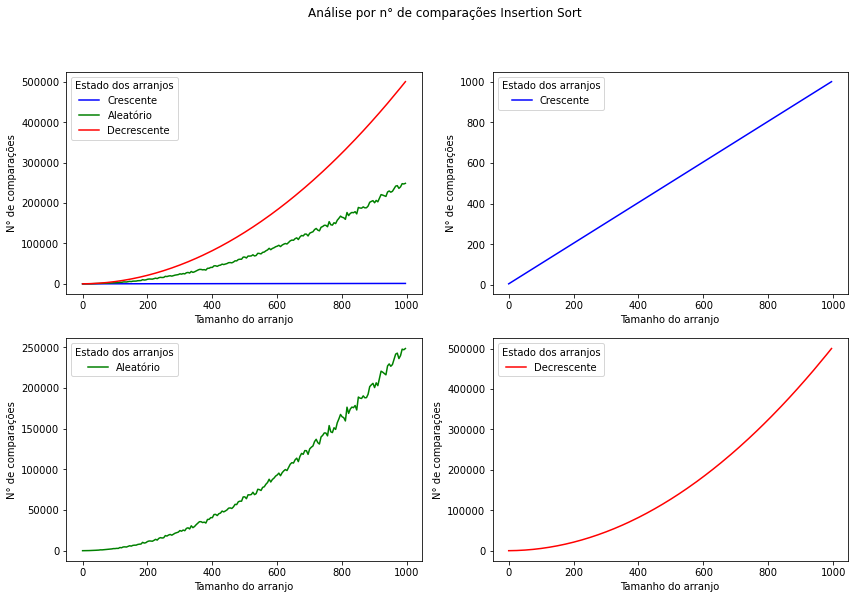

In [ ]:
arranjos = carregar_arranjos_originais()
    
limpar_dicionario(comparacoes)

ordernar(arranjos, insertionSort)

gerar_grafico(comparacoes, 'Insertion Sort')

In [ ]:
comps_insertion = deepcopy(comparacoes)

### Merge Sort

- Melhor caso: Independe do estado de ordenação do arranjo

- Pior caso: Independe do estado de ordenação do arranjo

     - Como poder ser visto nos gráficos, o número de comparações é o mesmo para todas as configurações de arranjo

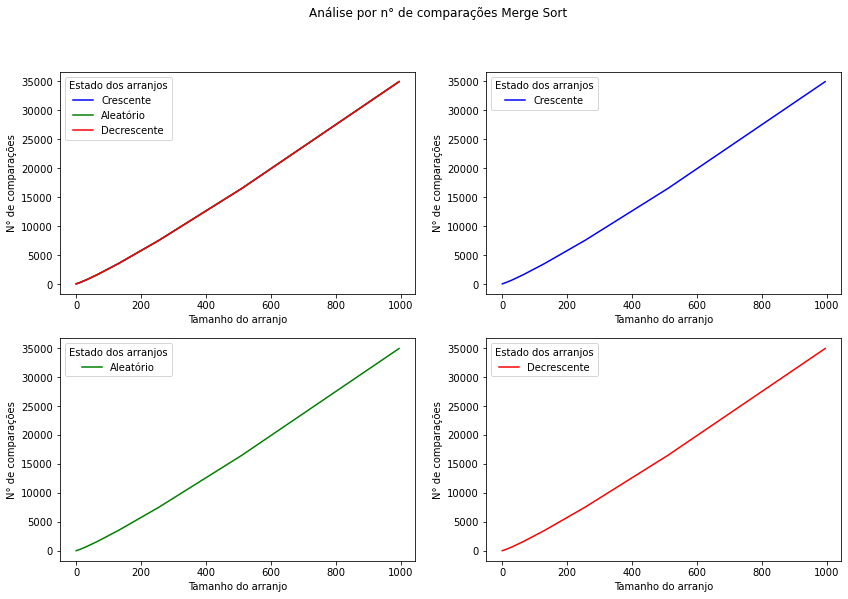

In [ ]:
arranjos = carregar_arranjos_originais()
    
limpar_dicionario(comparacoes)

for chave in arranjos:
    for arranjo in arranjos[chave]:
        n_comparacoes = 0
        mergeSort(arranjo, 0, len(arranjo) - 1)
        comparacoes[chave].append(n_comparacoes)

gerar_grafico(comparacoes, 'Merge Sort')

In [ ]:
comps_merge = deepcopy(comparacoes)

### Selection Sort

- Melhor caso: Independe do estado de ordenação do arranjo

- Pior caso: Independe do estado de ordenação do arranjo

     - O algoritimo Selection Sort faz sempre as mesmas rotinas independente da ordenação previa do arranjo

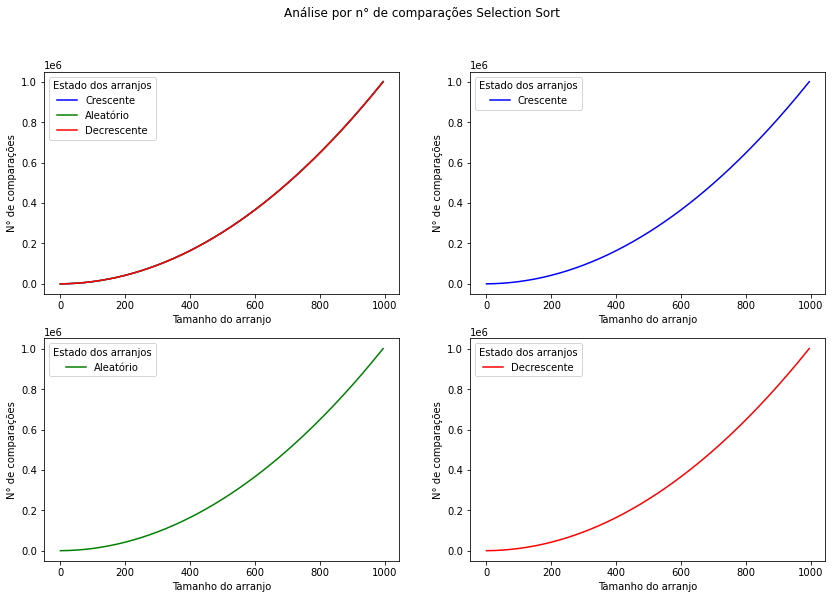

In [ ]:
arranjos = carregar_arranjos_originais()
    
limpar_dicionario(comparacoes)

ordernar(arranjos, selectionSort)

gerar_grafico(comparacoes, 'Selection Sort')

In [ ]:
comps_selection = deepcopy(comparacoes)

### Bubble Sort

- Melhor caso: Arranjo já ordenado de forma crescente

- Pior caso: Quando o arranjo se encontra ordenado de maneira decrescente, no entanto o caso aleatório fica muito próximo ao descrescente

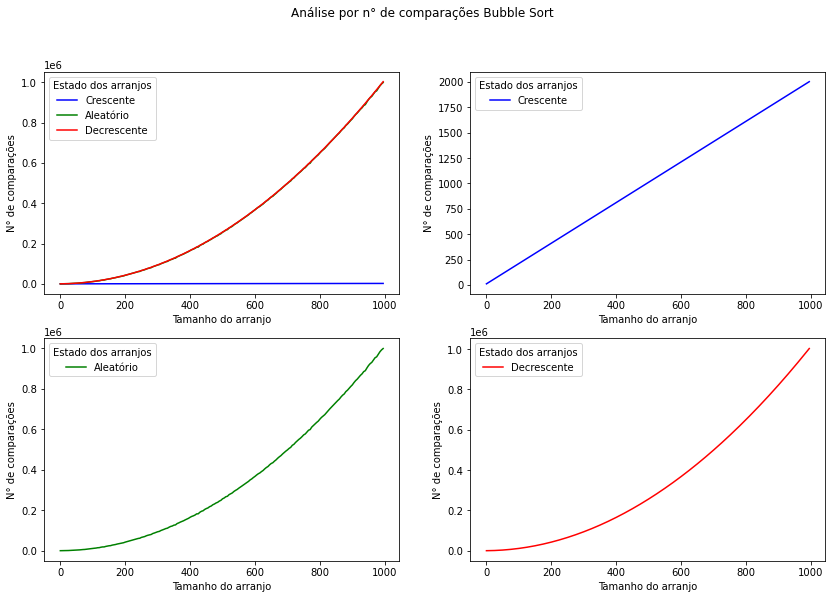

In [ ]:
arranjos = carregar_arranjos_originais()
    
limpar_dicionario(comparacoes)

ordernar(arranjos, bubbleSort)

gerar_grafico(comparacoes, 'Bubble Sort')

In [ ]:
comps_bubble = deepcopy(comparacoes)

### Heap Sort

- Melhor caso: Arranjo está ordenado de forma decrescente
    - Dessa forma ele já está organizado em uma heap de máximos, logo na etapa de construção da heap de máximos ele apenas verifica.


- Pior caso: Arranjo já ordenado de forma crescente
    - Nesse caso a todo filho é maior que o pai, então o processo de gearação de heap de máximos deve completo, trabalhando do elementos do arranjo

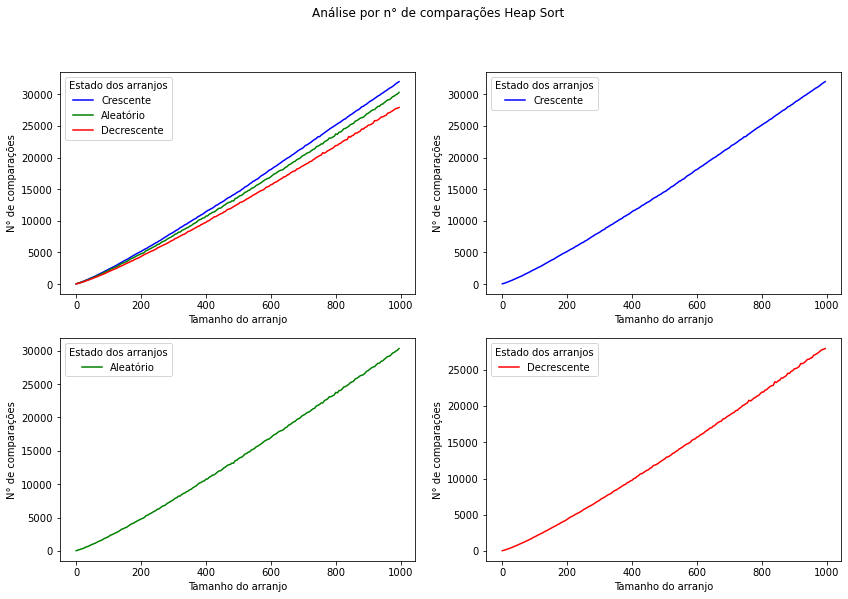

In [ ]:
arranjos = carregar_arranjos_originais()
    
limpar_dicionario(comparacoes)

for chave in arranjos:
    for arranjo in arranjos[chave]:
        n_comparacoes = 0
        heapSort(arranjo)
        comparacoes[chave].append(n_comparacoes)

gerar_grafico(comparacoes, 'Heap Sort')

In [ ]:
comps_heap = deepcopy(comparacoes)

### Quick Sort

- Melhor caso: Arranjo desordenado
    - Pois nesses casos, geralmente, o pivo geralmente divide ao meio as subdivisões, reduzindo a quantidade de chamadas recursivas
- Pior caso: Arranjo já ordenado de forma crescente
    - Nesse caso o pivo sempre será o último elemento do arranjo, então o método de partição sempre retornará o tamanho da lista anterior - 1, o que criará o máximo de chamadas recursivas

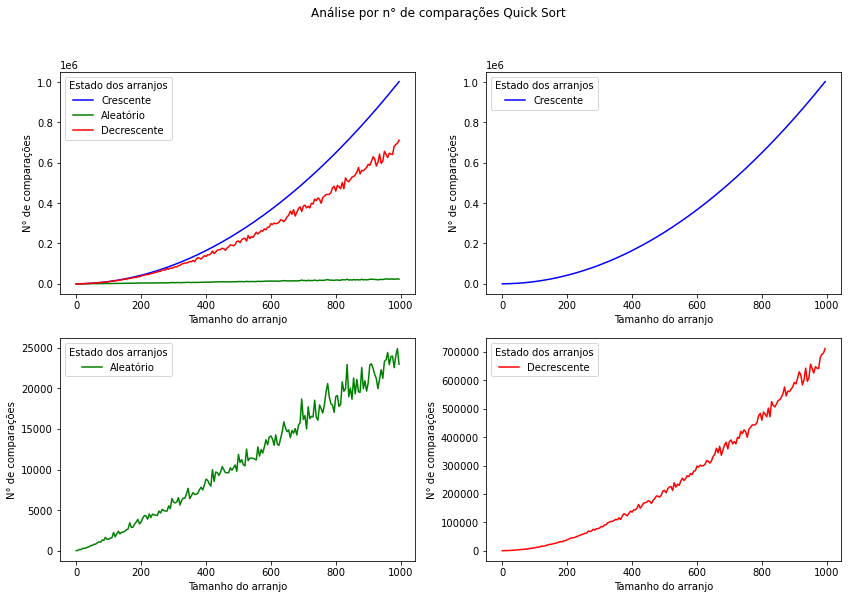

In [ ]:
arranjos = carregar_arranjos_originais()
    
limpar_dicionario(comparacoes)

for chave in arranjos:
    for arranjo in arranjos[chave]:
        n_comparacoes = 0
        quickSort(arranjo, 0, len(arranjo) - 1)
        comparacoes[chave].append(n_comparacoes)

gerar_grafico(comparacoes, 'Quick Sort')

In [ ]:
comps_quick = deepcopy(comparacoes)

## 1. B)

### Melhores casos

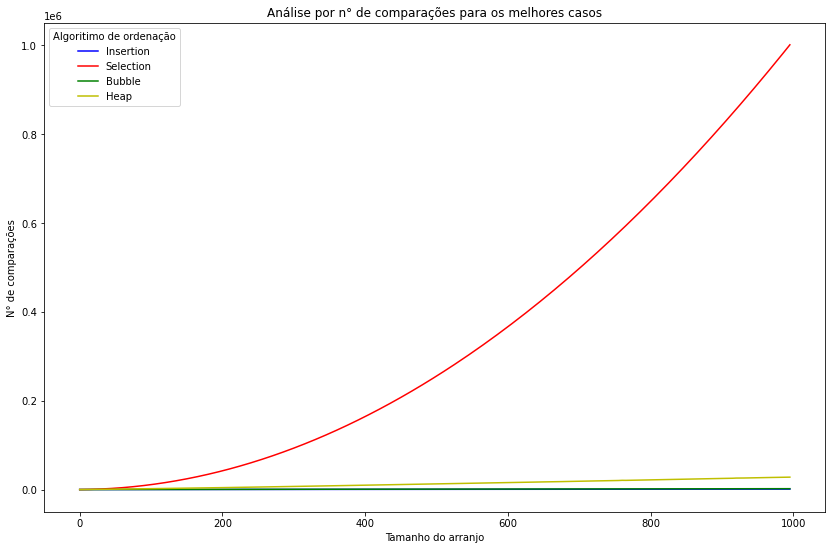

In [ ]:
x = [] # Para dar a medida em quantidade de elementos
for i in range(0, 200):
    x.append(i*5)

plt.figure(figsize=(14,9))
plt.title('Análise por n° de comparações para os melhores casos')
plt.plot(x, comps_insertion['crescente'], label='Insertion', color='b')
plt.plot(x, comps_selection['crescente'], label='Selection', color='r')
plt.plot(x, comps_bubble['crescente'], label='Bubble', color='g')
plt.plot(x, comps_heap['decrescente'], label='Heap', color='y')
plt.xlabel("Tamanho do arranjo")
plt.ylabel("N° de comparações")
plt.legend(title='Algoritimo de ordenação')


plt.show()

### Piores casos

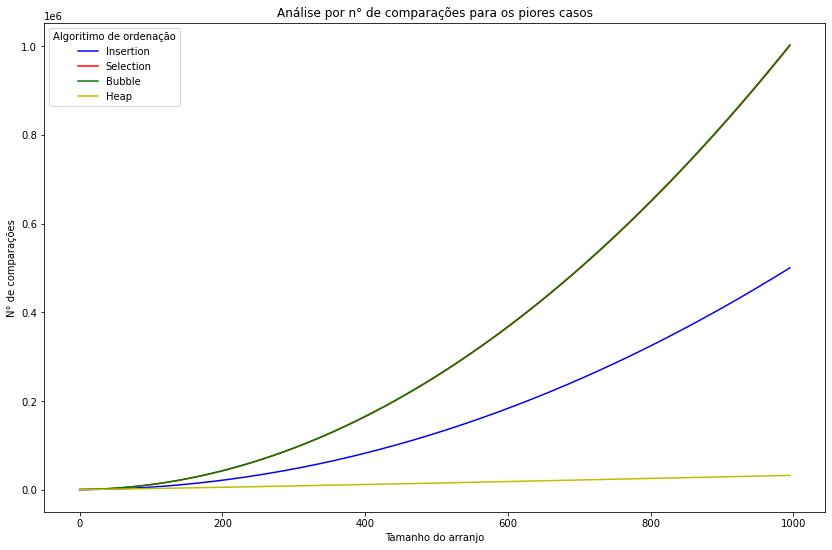

In [ ]:
x = [] # Para dar a medida em quantidade de elementos
for i in range(0, 200):
    x.append(i*5)

plt.figure(figsize=(14,9))
plt.title('Análise por n° de comparações para os piores casos')
plt.plot(x, comps_insertion['decrescente'], label='Insertion', color='b')
plt.plot(x, comps_selection['decrescente'], label='Selection', color='r')
plt.plot(x, comps_bubble['decrescente'], label='Bubble', color='g')
plt.plot(x, comps_heap['crescente'], label='Heap', color='y')
plt.xlabel("Tamanho do arranjo")
plt.ylabel("N° de comparações")
plt.legend(title='Algoritimo de ordenação')


plt.show()

### Casos Aleatórios

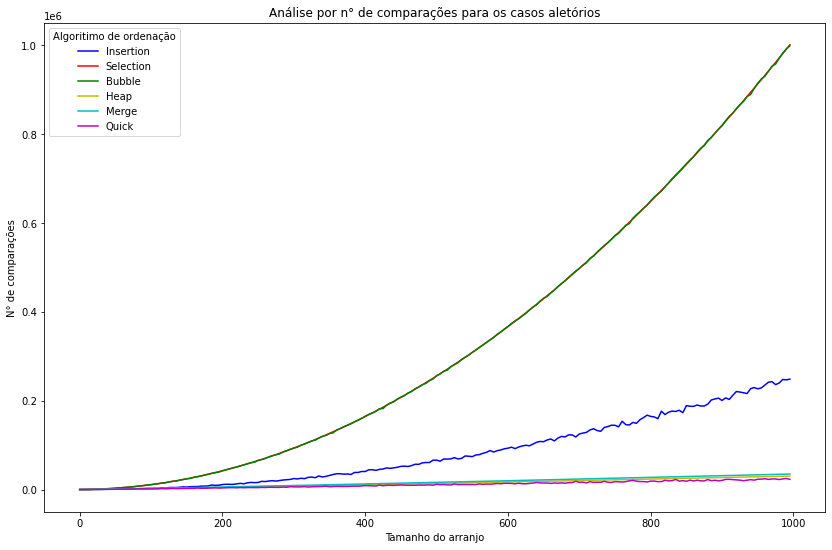

In [ ]:
x = [] # Para dar a medida em quantidade de elementos
for i in range(0, 200):
    x.append(i*5)

plt.figure(figsize=(14,9))
plt.title('Análise por n° de comparações para os casos aletórios')
plt.plot(x, comps_insertion['aleatorio'], label='Insertion', color='b')
plt.plot(x, comps_selection['aleatorio'], label='Selection', color='r')
plt.plot(x, comps_bubble['aleatorio'], label='Bubble', color='g')
plt.plot(x, comps_heap['aleatorio'], label='Heap', color='y')
plt.plot(x, comps_merge['aleatorio'], label='Merge', color='c')
plt.plot(x, comps_quick['aleatorio'], label='Quick', color='m')
plt.xlabel("Tamanho do arranjo")
plt.ylabel("N° de comparações")
plt.legend(title='Algoritimo de ordenação')


plt.show()

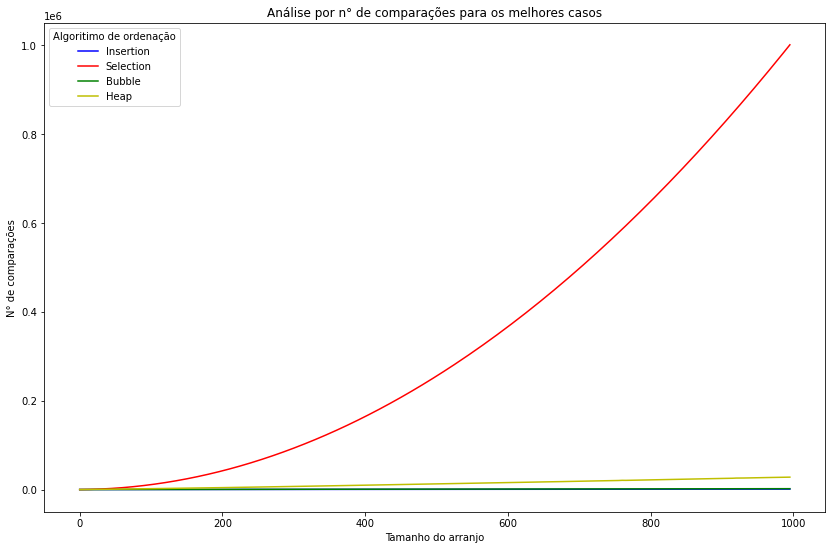

In [ ]:
x = [] # Para dar a medida em quantidade de elementos
for i in range(0, 200):
    x.append(i*5)

plt.figure(figsize=(14,9))
plt.title('Análise por n° de comparações para os melhores casos')
plt.plot(x, comps_insertion['crescente'], label='Insertion', color='b')
plt.plot(x, comps_selection['crescente'], label='Selection', color='r')
plt.plot(x, comps_bubble['crescente'], label='Bubble', color='g')
plt.plot(x, comps_heap['decrescente'], label='Heap', color='y')
plt.xlabel("Tamanho do arranjo")
plt.ylabel("N° de comparações")
plt.legend(title='Algoritimo de ordenação')


plt.show()

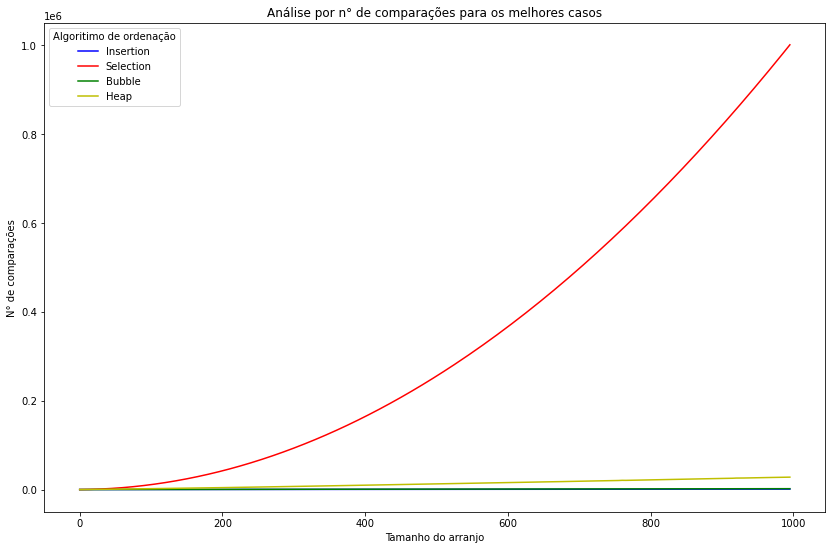

In [ ]:
x = [] # Para dar a medida em quantidade de elementos
for i in range(0, 200):
    x.append(i*5)

plt.figure(figsize=(14,9))
plt.title('Análise por n° de comparações para os melhores casos')
plt.plot(x, comps_insertion['crescente'], label='Insertion', color='b')
plt.plot(x, comps_selection['crescente'], label='Selection', color='r')
plt.plot(x, comps_bubble['crescente'], label='Bubble', color='g')
plt.plot(x, comps_heap['decrescente'], label='Heap', color='y')
plt.xlabel("Tamanho do arranjo")
plt.ylabel("N° de comparações")
plt.legend(title='Algoritimo de ordenação')


plt.show()

## 1. C)
 - *Com base nos gráficos gerados e na estrutura dos algoritmos, a complexidade dos mesmos são as seguintes:*

### Insertion Sort

- Melhor caso = $O(n)$

    - Pois apenas roda o loop FOR e não entra no WHILE, uma vez que o elemento chave sempre será maior que seus anteriores.



- Pior caso = $O(n^2)$
    - Para cada loop do FOR, a chave será menor do que os elementos da invariante de laço, assim é necessário sempre movimentar todos elementos da invariante dentro do WHILE na ordem de $n$ vezes, que multiplicadado a ordem $n$ do FOR, gera $n^2$    



- Aleatórios = $O(n^2)$
    - Apesar de gerar menos movimentações do que o pior caso, sua forma é quadrática dividida por alguma constante, logo é $O(n^2)$


### Merge Sort

- Melhor caso = $\Theta  (n\log n)$

- Pior caso = $\Theta  (n\log n)$

- Aleatórios = $\Theta  (n\log n)$

- Pois independente da configuração, há seguinte relação de recorrência $T(n)=2∗T(N/2)+N$.

### Selection Sort

- Melhor caso = $O(n^2)$

- Pior caso = $O(n^2)$

- Aleatórios = $O(n^2)$

- O algoritimo possui dois FOR's sendo que o primeiro rodará n vezes e o segundo $\frac{n(n-1)}{2}$ vezes independente da ordenação do arranjo, logo, $O(n^2)$ para todos os casos.

### Bubble Sort

- Melhor caso = $O(n)$

    - Apenas roda o FOR mais interno uma vez em todo arranjo verificando se está ordenado, como está ordenado a variável boolena indica para encerrar a ordenação.



- Pior caso = $O(n^2)$
    - Quando o arranjo está ordenado de forma decrescente é preciso fazer cerca de $\frac{n(n-1)}{2}$ trocas.



- Aleatórios = $O(n^2)$
    - Como pode ser visto no gráfico.

### Heap Sort

- Melhor caso = $\Theta  (n\log n)$


- Pior caso = $\Theta (n\log n)$


- Aleatórios = $\Theta (n\log n)$

- Em qualquer caso a complexidade é $\Theta (n\log n)$, pois a construção da heap é sempre $O(n)$ e o ajuste dos elementos é $O(\log n)$

### Quick Sort

- Melhor caso = $O (n\log n)$
    - Nesse caso o pivo sempre dividi a metáde do arranjo, semelhande a uma árvore binária $O(\log n)$, em conjuto com a complixidade do método de partição $O(n)$.

- Pior caso = $O(n^2)$
    - Quando o pivo é o último elemento e o arranjo se encontra ordenado de maneira crescente as divisões serão de 0 a n-1, o que faz com que o método de particão execute cerca de $\frac{n(n-1)}{2}$ loops.


- Aleatórios = $O (n\log n)$
    - Na grande maioria das vezes semelhante ao melhor caso.

## 2.   Desenvolva uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.



In [ ]:
def quickSortA(arranjo, ini, fim):
    global n_comparacoes
    n_comparacoes += 1
    if ini < fim:
        p = partition_aleatorio(arranjo, ini, fim)       
        quickSortA(arranjo, ini, p - 1)
        quickSortA(arranjo, p +1, fim)

def partition_aleatorio(arranjo, ini, fim):
    global n_comparacoes
    
    posicaoPivo = np.random.randint(ini, fim + 1)    
    p = arranjo[posicaoPivo]
    e = ini-1
    a = ini-1
    for i in range(ini, fim+1):
        n_comparacoes += 1 + 1
        if arranjo[i] > p:           
            a += 1
        else:
            e += 1
            a += 1
            arranjo[a], arranjo[e] = arranjo[e], arranjo[a]
    n_comparacoes += 1
    return e

In [ ]:
with open('arranjos.pkl', 'rb') as file:
    arranjos = pickle.load(file)
    
limpar_dicionario(comparacoes)

for chave in arranjos:
    for arranjo in arranjos[chave]:
        n_comparacoes = 0
        quickSortA(arranjo, 0, len(arranjo) - 1)
        comparacoes[chave].append(n_comparacoes)

In [ ]:
comps_quick_aleatorio = deepcopy(comparacoes)

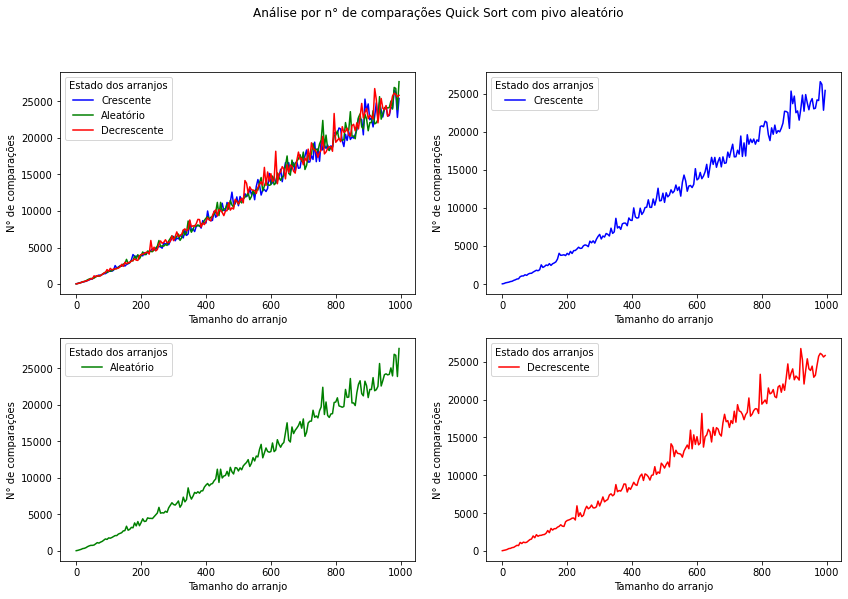

In [ ]:
gerar_grafico(comps_quick_aleatorio, "Quick Sort com pivo aleatório")

### Comparação pivo aleatório vs pivo igual ao comprimento do arranjo

#### Melhores casos
Nessa situação o pivo fixo se saiu ligeiramente melhor ao pivo aleatório. E não há melhor caso para o pivo aleatório, como pode ser visto nos gráficos logo acima.

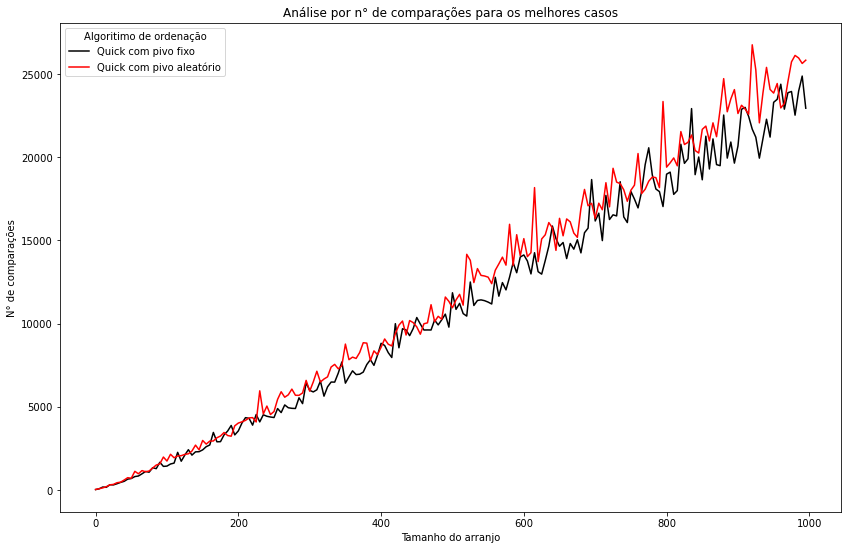

In [ ]:
x = [] # Para dar a medida em quantidade de elementos
for i in range(0, 200):
    x.append(i*5)

plt.figure(figsize=(14,9))
plt.title('Análise por n° de comparações para os melhores casos')
plt.plot(x, comps_quick['aleatorio'], label='Quick com pivo fixo', color='k')
plt.plot(x, comps_quick_aleatorio['decrescente'], label='Quick com pivo aleatório', color='r')
plt.xlabel("Tamanho do arranjo")
plt.ylabel("N° de comparações")
plt.legend(title='Algoritimo de ordenação')
plt.show()

#### Casos Aleatórios
Semelhante aos melhores casos.

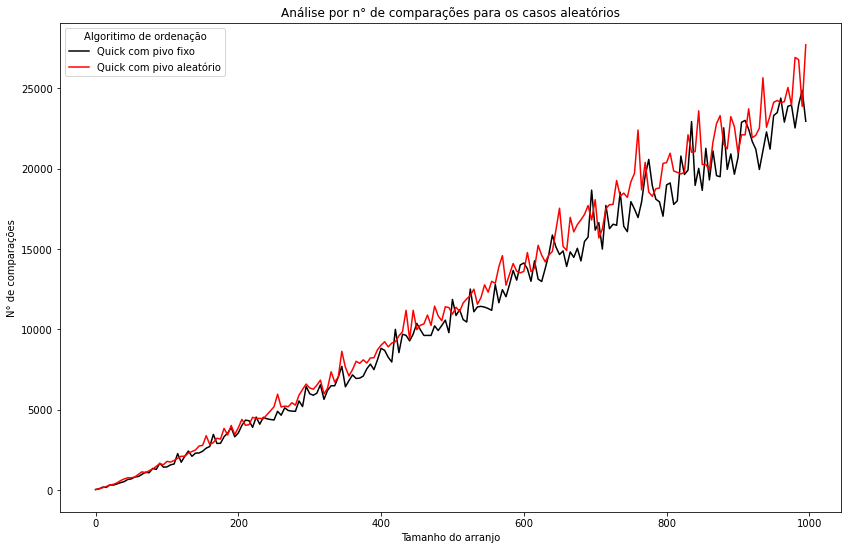

In [ ]:
x = [] # Para dar a medida em quantidade de elementos
for i in range(0, 200):
    x.append(i*5)

plt.figure(figsize=(14,9))
plt.title('Análise por n° de comparações para os casos aleatórios')
plt.plot(x, comps_quick['aleatorio'], label='Quick com pivo fixo', color='k')
plt.plot(x, comps_quick_aleatorio['aleatorio'], label='Quick com pivo aleatório', color='r')
plt.xlabel("Tamanho do arranjo")
plt.ylabel("N° de comparações")
plt.legend(title='Algoritimo de ordenação')
plt.show()

#### Piores Casos
Nessa situação, o uso de pivo aleatório sobressai o pivo fixo, nessecitando de menos comparações.

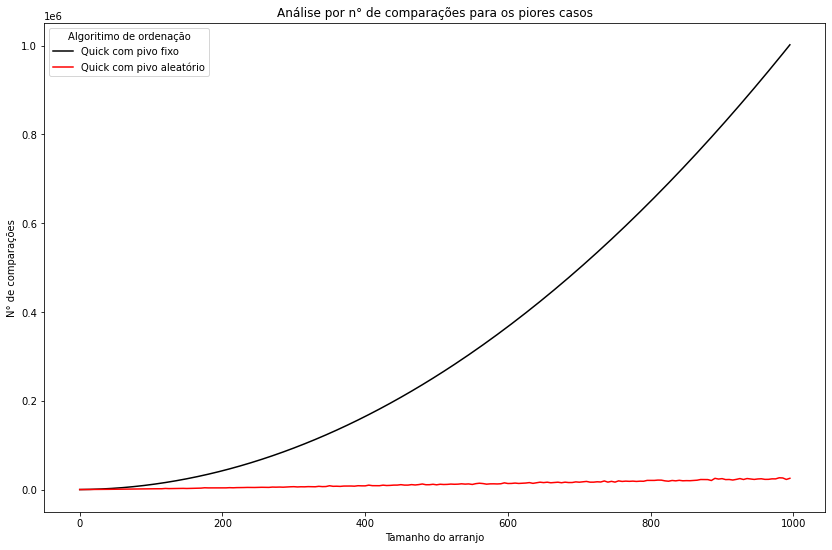

In [ ]:
x = [] # Para dar a medida em quantidade de elementos
for i in range(0, 200):
    x.append(i*5)

plt.figure(figsize=(14,9))
plt.title('Análise por n° de comparações para os piores casos')
plt.plot(x, comps_quick['crescente'], label='Quick com pivo fixo', color='k')
plt.plot(x, comps_quick_aleatorio['crescente'], label='Quick com pivo aleatório', color='r')
plt.xlabel("Tamanho do arranjo")
plt.ylabel("N° de comparações")
plt.legend(title='Algoritimo de ordenação')
plt.show()